# 計算機実習 問題6.2-ロジスティック写像の定性的な特徴

## シミュレーションの目的

ロジスティック写像
\begin{eqnarray}
 x_{n+1}=f(x_{n})=4rx_{n}(1-x_{n})
\end{eqnarray}
の振る舞いを調べる方法の一つとして、$x$の値を$r$の関数としてプロットする方法がある。初期の過渡的な振る舞いを捨てて、その後の反復で得られる$x$の値をプロットするのである。本シミュレーションの目的は、式(1)を差分方程式として扱い、上に述べたような条件を満たすようなプログラムを作成して、実際にシミュレーションを行うことである。

## 実習課題

### 問題 a：

作成したプログラムを使って、図6.2の再現を行う。

値を設定してOKボタンを押すことで、その値で計算されたロジスティック写像の分岐図が描画される。はじめのntransient回は、計算はするがプロットはされず、次のnplot回は赤でプロットし、その後のnplot回は青でプロットする。

In [1]:
%matplotlib inline
from __future__ import print_function
from math import *
from IPython.html.widgets import interact, interactive
from IPython.html import widgets
from IPython.display import display
import matplotlib.pylab as plt
import array as array
import numpy as np

def Plot(func, x0, ntransient, nplot, r0, rmax, dr):
    global x
    count = int((rmax-r0)/dr)
    [_Plot(func, r0+dr*n, x0, ntransient, nplot) for n in range(count+1)]
    plt.gca().set_xlim(r0, rmax)
    plt.gca().set_ylim(min(x), max(x))
    plt.xlabel(r'$r$', fontsize=16)
    plt.ylabel(r'$x$', fontsize=16)
    plt.title('Bifurcation Diagram')
    plt.show()

def _Plot(function, r, x0, ntransient, nplot):
    global x
    n = ntransient + nplot*2
    x = array.array('f')
    x.append(x0)
    for i in range(n):
        x.append(function(x[i], r))
    plt.scatter([r]*nplot, x[ntransient+1:ntransient+nplot+1],
                color='r', s=0.1, marker='.'
                )
    plt.scatter([r]*nplot, x[ntransient+nplot+1:n+1],
                color='b', s=0.1, marker='.'
                )

<function func at 0x7f185867f398> 0.3 700 50 0.7


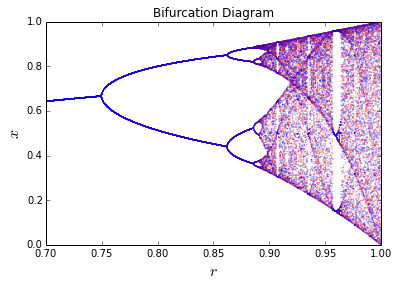

In [12]:
button = widgets.Button(description="Run")
display(button)

def func(x_i, r):
    return 4.0 * r * x_i * (1.0 - x_i) 

def assignment(x0=0.3, r0=0.7, ntransient=1000, nplot=50):
    print(func, x0, ntransient, nplot, r0)
    
w = interactive(assignment, x0=(0.0, 1.0, 0.01), r0=(0.0, 1.0, 0.1),\
                ntransient=(500,2000,100), nplot=(10, 100, 10))
display(w)

def on_button_clicked(b):
    rmax = 1.0
    dr = 0.0005
    kw = w.kwargs
    x0 = kw['x0']
    ntransient = kw['ntransient']
    nplot = kw['nplot']
    r0 = kw['r0']
    Plot(func, x0, ntransient, nplot, r0, rmax, dr)

button.on_click(on_button_clicked)

グラフから、$r=0.75$で周期が2になり、$r=0.86$のあたりで周期が4となり、また$r=0.89$のあたりで周期が8となっていく様子を見ることができる。また、それ以降は判別が難しくなり、カオス的な振る舞いとなった。しかし、ところどころには周期的振る舞いを示す領域も存在していることも見て取れる。

## まとめ

ロジスティック写像の定性的な特徴を、Bifurcation-Diaglamを作成することにより確認することができた。

## 参考文献

- ハーベイ・ゴールド,ジャン・トボチニク,石川正勝・宮島佐介訳『計算物理学入門』,ピアソン・エデュケーション, 2000.